<a href="https://colab.research.google.com/github/OswaldGutierrez/Modelos-IA/blob/main/PreProcesado_NATICUSdroid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size="6">PROYECTO IA 2025-2</font>


<font size="3">**1. IMPORTACIÓN DE LIBRERÍAS NECESARIAS**</font>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Configuramos el estilo de las gráficas
plt.style.use('default')
sns.set_palette("husl")

<font size="3">**2. DESCARGA DEL DATASET**</font>


In [2]:
!wget https://raw.githubusercontent.com/OswaldGutierrez/dataNATICUSdroid/main/naticusdroid+android+permissions+dataset.zip
!unzip naticusdroid+android+permissions+dataset.zip

--2025-11-24 13:07:23--  https://raw.githubusercontent.com/OswaldGutierrez/dataNATICUSdroid/main/naticusdroid+android+permissions+dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5136681 (4.9M) [application/zip]
Saving to: ‘naticusdroid+android+permissions+dataset.zip.2’

naticusdroid+androi 100%[===================>]   4.90M  --.-KB/s    in 0.09s   

2025-11-24 13:07:23 (53.0 MB/s) - ‘naticusdroid+android+permissions+dataset.zip.2’ saved [5136681/5136681]

Archive:  naticusdroid+android+permissions+dataset.zip
replace data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: data.csv                


In [3]:
# Cargamos el dataset en un DataFrame
d = pd.read_csv("data.csv")
print("Dataset cargado correctamente!")

Dataset cargado correctamente!


<font size="3">**3. INFORMACIÓN DEL DATASET**</font>


In [4]:
# DIMENSIONES DEL DATASET
print("="*50)
print("DIMENSIONES DEL DATASET")
print("="*50)

print(f"Número de filas: {d.shape[0]}")
print(f"Número de columnas: {d.shape[1]}")
print(f"Dimensión total: {d.shape}")

DIMENSIONES DEL DATASET
Número de filas: 29332
Número de columnas: 87
Dimensión total: (29332, 87)


In [5]:
# CARACTERÍSTICAS DEL DATASET
print("="*50)
print("PRIMERAS FILAS DEL DATASET")
print("="*50)
display(d.head(10))

print("\n" + "="*50)
print("ÚLTIMAS FILAS DEL DATASET")
print("="*50)
display(d.tail(10))

PRIMERAS FILAS DEL DATASET


,android.permission.GET_ACCOUNTS,com.sonyericsson.home.permission.BROADCAST_BADGE,android.permission.READ_PROFILE,android.permission.MANAGE_ACCOUNTS,android.permission.WRITE_SYNC_SETTINGS,android.permission.READ_EXTERNAL_STORAGE,android.permission.RECEIVE_SMS,com.android.launcher.permission.READ_SETTINGS,android.permission.WRITE_SETTINGS,com.google.android.providers.gsf.permission.READ_GSERVICES,...,com.android.launcher.permission.UNINSTALL_SHORTCUT,com.sec.android.iap.permission.BILLING,com.htc.launcher.permission.UPDATE_SHORTCUT,com.sec.android.provider.badge.permission.WRITE,android.permission.ACCESS_NETWORK_STATE,com.google.android.finsky.permission.BIND_GET_INSTALL_REFERRER_SERVICE,com.huawei.android.launcher.permission.READ_SETTINGS,android.permission.READ_SMS,android.permission.PROCESS_INCOMING_CALLS,Result
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,1,1,0,0,0,1,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0



ÚLTIMAS FILAS DEL DATASET


,android.permission.GET_ACCOUNTS,com.sonyericsson.home.permission.BROADCAST_BADGE,android.permission.READ_PROFILE,android.permission.MANAGE_ACCOUNTS,android.permission.WRITE_SYNC_SETTINGS,android.permission.READ_EXTERNAL_STORAGE,android.permission.RECEIVE_SMS,com.android.launcher.permission.READ_SETTINGS,android.permission.WRITE_SETTINGS,com.google.android.providers.gsf.permission.READ_GSERVICES,...,com.android.launcher.permission.UNINSTALL_SHORTCUT,com.sec.android.iap.permission.BILLING,com.htc.launcher.permission.UPDATE_SHORTCUT,com.sec.android.provider.badge.permission.WRITE,android.permission.ACCESS_NETWORK_STATE,com.google.android.finsky.permission.BIND_GET_INSTALL_REFERRER_SERVICE,com.huawei.android.launcher.permission.READ_SETTINGS,android.permission.READ_SMS,android.permission.PROCESS_INCOMING_CALLS,Result
29322,0,0,0,0,0,0,0,1,1,0,...,1,0,0,0,1,0,0,0,0,1
29323,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
29324,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
29325,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29326,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
29327,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
29328,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
29329,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
29330,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29331,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [6]:
# Ver nombres de todas las columnas
print("="*50)
print("NOMBRES DE LAS COLUMNAS")
print("="*50)

for i, col in enumerate(d.columns, 1):
    print(f"{i}. {col}")

NOMBRES DE LAS COLUMNAS
1. android.permission.GET_ACCOUNTS
2. com.sonyericsson.home.permission.BROADCAST_BADGE
3. android.permission.READ_PROFILE
4. android.permission.MANAGE_ACCOUNTS
5. android.permission.WRITE_SYNC_SETTINGS
6. android.permission.READ_EXTERNAL_STORAGE
7. android.permission.RECEIVE_SMS
8. com.android.launcher.permission.READ_SETTINGS
9. android.permission.WRITE_SETTINGS
10. com.google.android.providers.gsf.permission.READ_GSERVICES
11. android.permission.DOWNLOAD_WITHOUT_NOTIFICATION
12. android.permission.GET_TASKS
13. android.permission.WRITE_EXTERNAL_STORAGE
14. android.permission.RECORD_AUDIO
15. com.huawei.android.launcher.permission.CHANGE_BADGE
16. com.oppo.launcher.permission.READ_SETTINGS
17. android.permission.CHANGE_NETWORK_STATE
18. com.android.launcher.permission.INSTALL_SHORTCUT
19. android.permission.android.permission.READ_PHONE_STATE
20. android.permission.CALL_PHONE
21. android.permission.WRITE_CONTACTS
22. android.permission.READ_PHONE_STATE
23. com.

In [7]:
# DATOS FALTANTES
print("="*50)
print("ANÁLISIS DE DATOS FALTANTES")
print("="*50)

# Contar valores nulos por columna
missing_data = pd.DataFrame({
    'Columna': d.columns,
    'Valores_Nulos': d.isnull().sum(),
    'Porcentaje_Nulos': (d.isnull().sum() / len(d)) * 100
})

missing_data = missing_data[missing_data['Valores_Nulos'] > 0].sort_values(
    by='Valores_Nulos', ascending=False
)

if len(missing_data) > 0:
    print("\nColumnas con valores faltantes:")
    display(missing_data)
else:
    print("\nNo hay valores faltantes en el dataset")

# Resumen
print(f"\nTotal de valores faltantes: {d.isnull().sum().sum()}")
print(f"Porcentaje total de datos faltantes: {(d.isnull().sum().sum() / (d.shape[0] * d.shape[1])) * 100:.2f}%")

ANÁLISIS DE DATOS FALTANTES

No hay valores faltantes en el dataset

Total de valores faltantes: 0
Porcentaje total de datos faltantes: 0.00%


In [8]:
# TIPO DE LAS COLUMNAS
print("="*50)
print("TIPOS DE DATOS DE LAS COLUMNAS")
print("="*50)

data_types = pd.DataFrame({
    'Columna': d.dtypes.index,
    'Tipo_de_Dato': d.dtypes.values
})

display(data_types)

# Resumen de tipos de datos
print("\nResumen de tipos de datos:")
print(d.dtypes.value_counts())

TIPOS DE DATOS DE LAS COLUMNAS


,Columna,Tipo_de_Dato
0,android.permission.GET_ACCOUNTS,int64
1,com.sonyericsson.home.permission.BROADCAST_BADGE,int64
2,android.permission.READ_PROFILE,int64
3,android.permission.MANAGE_ACCOUNTS,int64
4,android.permission.WRITE_SYNC_SETTINGS,int64
...,...,...
82,com.google.android.finsky.permission.BIND_GET_...,int64
83,com.huawei.android.launcher.permission.READ_SE...,int64
84,android.permission.READ_SMS,int64
85,android.permission.PROCESS_INCOMING_CALLS,int64



Resumen de tipos de datos:
int64    87
Name: count, dtype: int64


<font size="3">**3. DISTRIBUCIÓN DEL DATASET**</font>


DISTRIBUCIÓN DE LA VARIABLE OBJETIVO

Conteo de clases en 'Result':
Result
1    14700
0    14632
Name: count, dtype: int64

Porcentaje de cada clase:
Result
1    50.115914
0    49.884086
Name: proportion, dtype: float64


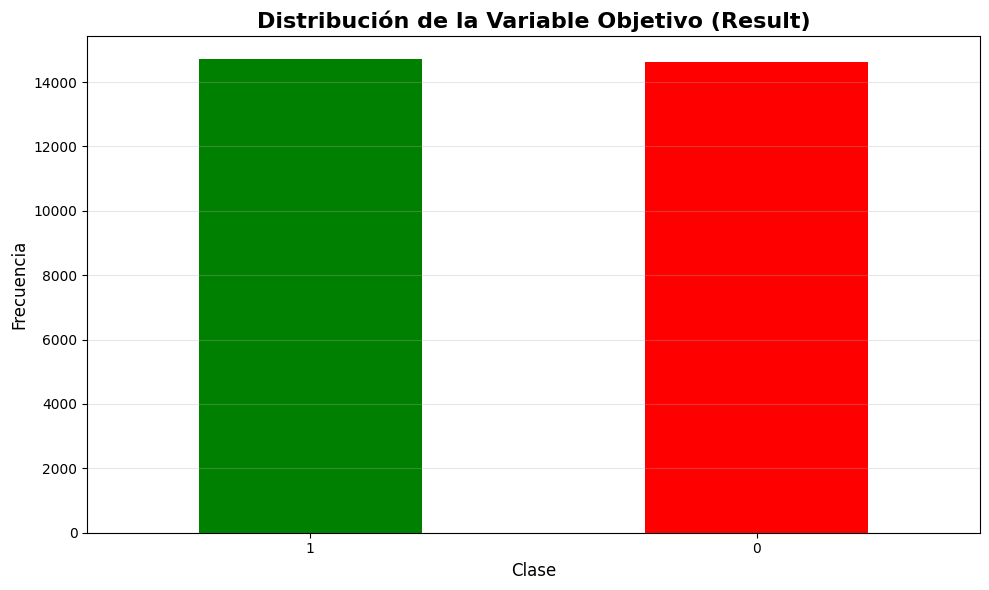

In [9]:
# DISTRIBUCIÓN DE LA VARIABLE OBJETIVO (Result)
print("="*50)
print("DISTRIBUCIÓN DE LA VARIABLE OBJETIVO")
print("="*50)

# Verificar si existe la columna 'Result'
if 'Result' in d.columns:
    print(f"\nConteo de clases en 'Result':")
    print(d['Result'].value_counts())
    print(f"\nPorcentaje de cada clase:")
    print(d['Result'].value_counts(normalize=True) * 100)

    # Gráfico de barras de la distribución de Result
    plt.figure(figsize=(10, 6))
    d['Result'].value_counts().plot(kind='bar', color=['green', 'red'])
    plt.title('Distribución de la Variable Objetivo (Result)', fontsize=16, fontweight='bold')
    plt.xlabel('Clase', fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.xticks(rotation=0)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("No se encontró la columna 'Result'")

TOP 15 PERMISOS MÁS UTILIZADOS


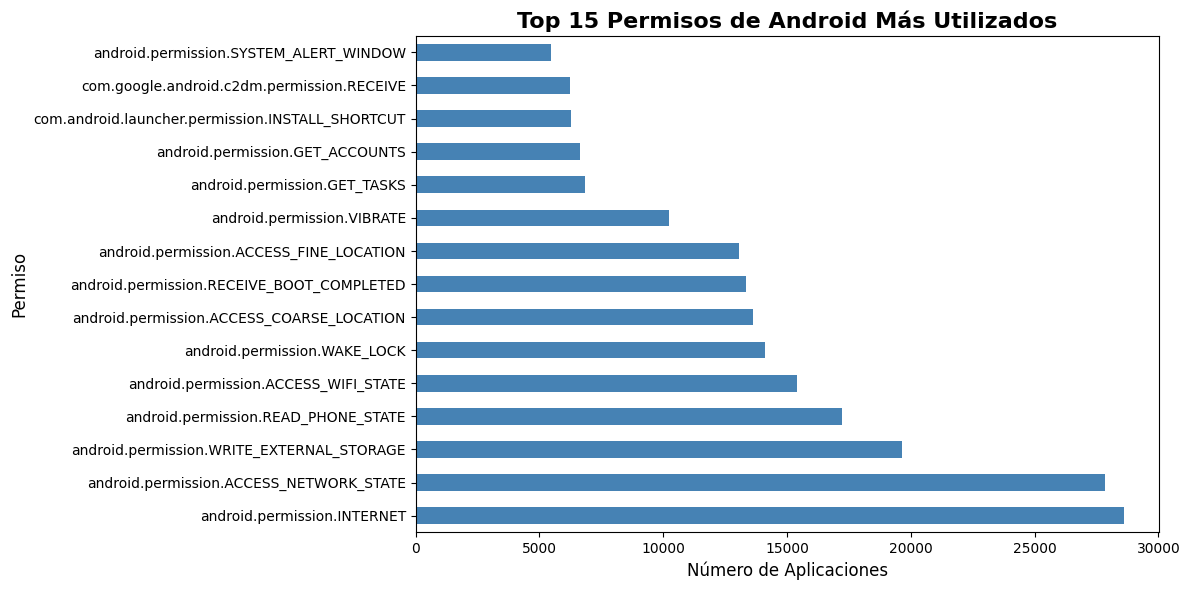

In [10]:
# Distribución de permisos más frecuentes
print("="*50)
print("TOP 15 PERMISOS MÁS UTILIZADOS")
print("="*50)

# Excluir la columna Result si existe
feature_cols = [col for col in d.columns if col != 'Result']

# Calcular la suma de cada permiso (cuántas apps lo usan)
permission_usage = d[feature_cols].sum().sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 6))
permission_usage.plot(kind='barh', color='steelblue')
plt.title('Top 15 Permisos de Android Más Utilizados', fontsize=16, fontweight='bold')
plt.xlabel('Número de Aplicaciones', fontsize=12)
plt.ylabel('Permiso', fontsize=12)
plt.tight_layout()
plt.show()

<font size="3">**4. CORRELACIÓN ENTRE PERMISOS Y LA VARIABLE OBJETIVO**</font>


CORRELACIÓN DE PERMISOS CON RESULT

Top 10 permisos con mayor correlación positiva:


,0
android.permission.READ_PHONE_STATE,0.724298
android.permission.RECEIVE_BOOT_COMPLETED,0.498770
com.android.launcher.permission.INSTALL_SHORTCUT,0.451202
android.permission.ACCESS_COARSE_LOCATION,0.431200
android.permission.ACCESS_FINE_LOCATION,0.408385
android.permission.GET_TASKS,0.388899
android.permission.SYSTEM_ALERT_WINDOW,0.328549
android.permission.WRITE_SETTINGS,0.219018
android.permission.ACCESS_WIFI_STATE,0.209953
android.permission.READ_CONTACTS,0.202439



Top 10 permisos con mayor correlación negativa:


,0
com.majeur.launcher.permission.UPDATE_BADGE,-0.183278
com.anddoes.launcher.permission.UPDATE_COUNT,-0.184472
com.htc.launcher.permission.UPDATE_SHORTCUT,-0.185689
com.sec.android.provider.badge.permission.READ,-0.187572
com.sonyericsson.home.permission.BROADCAST_BADGE,-0.187670
com.sec.android.provider.badge.permission.WRITE,-0.187768
com.google.android.providers.gsf.permission.READ_GSERVICES,-0.196365
android.permission.READ_EXTERNAL_STORAGE,-0.220920
com.android.vending.BILLING,-0.254819
com.google.android.c2dm.permission.RECEIVE,-0.486052


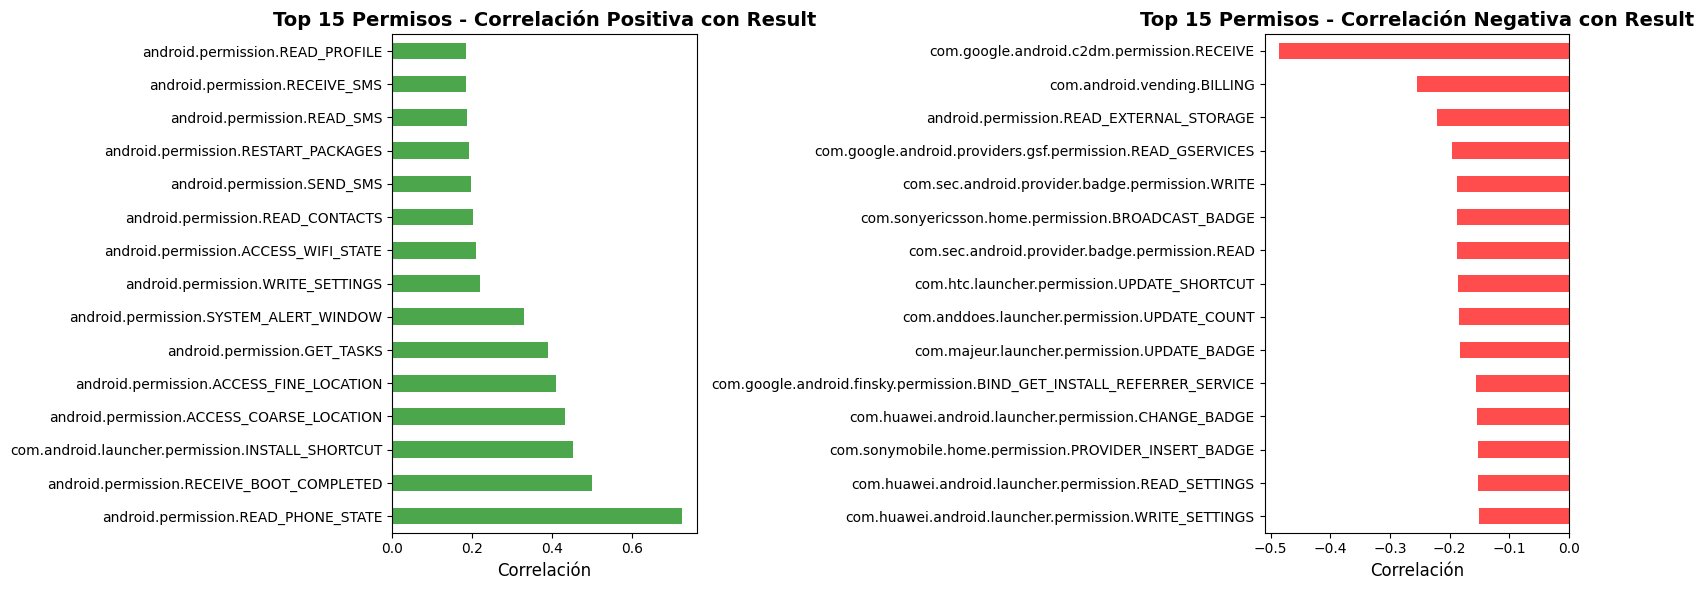

In [11]:
# Correlación entre permisos y la variable objetivo
if 'Result' in d.columns:
    print("="*50)
    print("CORRELACIÓN DE PERMISOS CON RESULT")
    print("="*50)

    # Calcular correlación
    correlations = d[feature_cols].corrwith(d['Result']).sort_values(ascending=False)

    print("\nTop 10 permisos con mayor correlación positiva:")
    display(correlations.head(10))

    print("\nTop 10 permisos con mayor correlación negativa:")
    display(correlations.tail(10))

    # Visualizar top correlaciones
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    correlations.head(15).plot(kind='barh', ax=ax1, color='green', alpha=0.7)
    ax1.set_title('Top 15 Permisos - Correlación Positiva con Result', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Correlación', fontsize=12)

    correlations.tail(15).plot(kind='barh', ax=ax2, color='red', alpha=0.7)
    ax2.set_title('Top 15 Permisos - Correlación Negativa con Result', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Correlación', fontsize=12)

    plt.tight_layout()
    plt.show()

<font size="3">**5. DISTRIBUCIÓN PCA**</font>


Varianza explicada por PC1: 0.1593
Varianza explicada por PC2: 0.0772
Varianza total explicada: 0.2365


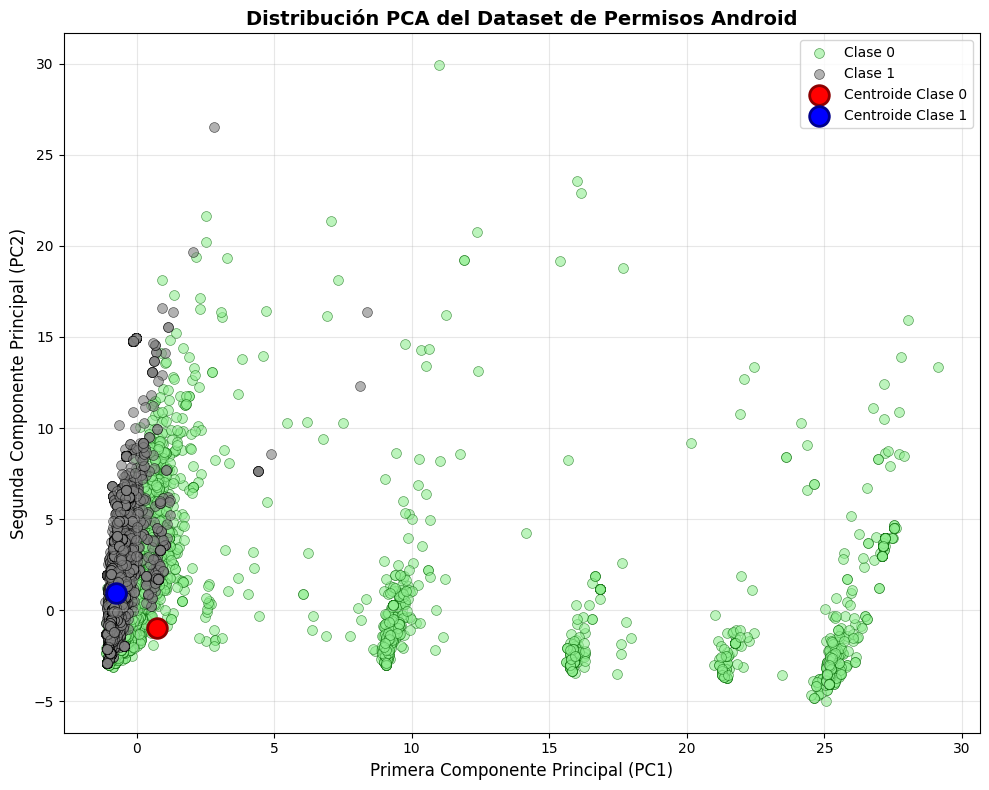


Centroide Clase 0: PC1=0.7399, PC2=-0.9705
Centroide Clase 1: PC1=-0.7365, PC2=0.9660


In [12]:
# Reducción de dimensionalidad a 2 componentes para visualizar el dataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Separarmos features y variable objetivo
if 'Result' in d.columns:
    X = d.drop('Result', axis=1)
    y = d['Result']

    # Es necesario estandarizar los datos
    # Como PCA nos pide que los datos estén en la misma escala, aplicamos:
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Esto nos permite visualizar los datos en 2D
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    print(f"Varianza explicada por PC1: {pca.explained_variance_ratio_[0]:.4f}")
    print(f"Varianza explicada por PC2: {pca.explained_variance_ratio_[1]:.4f}")
    print(f"Varianza total explicada: {sum(pca.explained_variance_ratio_):.4f}")

    # Creamos el gráfico de dispersión PCA
    plt.figure(figsize=(10, 8))

    # Separamos por clase
    class_0 = X_pca[y == 0]
    class_1 = X_pca[y == 1]

    # Graficamos cada clase con diferente color
    plt.scatter(class_0[:, 0], class_0[:, 1],
                c='lightgreen', alpha=0.6, s=50,
                label='Clase 0', edgecolors='darkgreen', linewidth=0.5)

    plt.scatter(class_1[:, 0], class_1[:, 1],
                c='gray', alpha=0.6, s=50,
                label='Clase 1', edgecolors='black', linewidth=0.5)

    # Calculamos y mostrar centroides de cada clase
    centroid_0 = [class_0[:, 0].mean(), class_0[:, 1].mean()]
    centroid_1 = [class_1[:, 0].mean(), class_1[:, 1].mean()]

    plt.scatter(centroid_0[0], centroid_0[1],
                c='red', s=200, marker='o',
                label='Centroide Clase 0',
                edgecolors='darkred', linewidth=2, zorder=5)

    plt.scatter(centroid_1[0], centroid_1[1],
                c='blue', s=200, marker='o',
                label='Centroide Clase 1',
                edgecolors='darkblue', linewidth=2, zorder=5)

    plt.xlabel('Primera Componente Principal (PC1)', fontsize=12)
    plt.ylabel('Segunda Componente Principal (PC2)', fontsize=12)
    plt.title('Distribución PCA del Dataset de Permisos Android', fontsize=14, fontweight='bold')
    plt.legend(loc='best', fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    print(f"\nCentroide Clase 0: PC1={centroid_0[0]:.4f}, PC2={centroid_0[1]:.4f}")
    print(f"Centroide Clase 1: PC1={centroid_1[0]:.4f}, PC2={centroid_1[1]:.4f}")

<font size="3">**6. MATRIZ DE CORRELACIÓN**</font>


MATRIZ DE CORRELACIÓN (Muestra de Permisos)


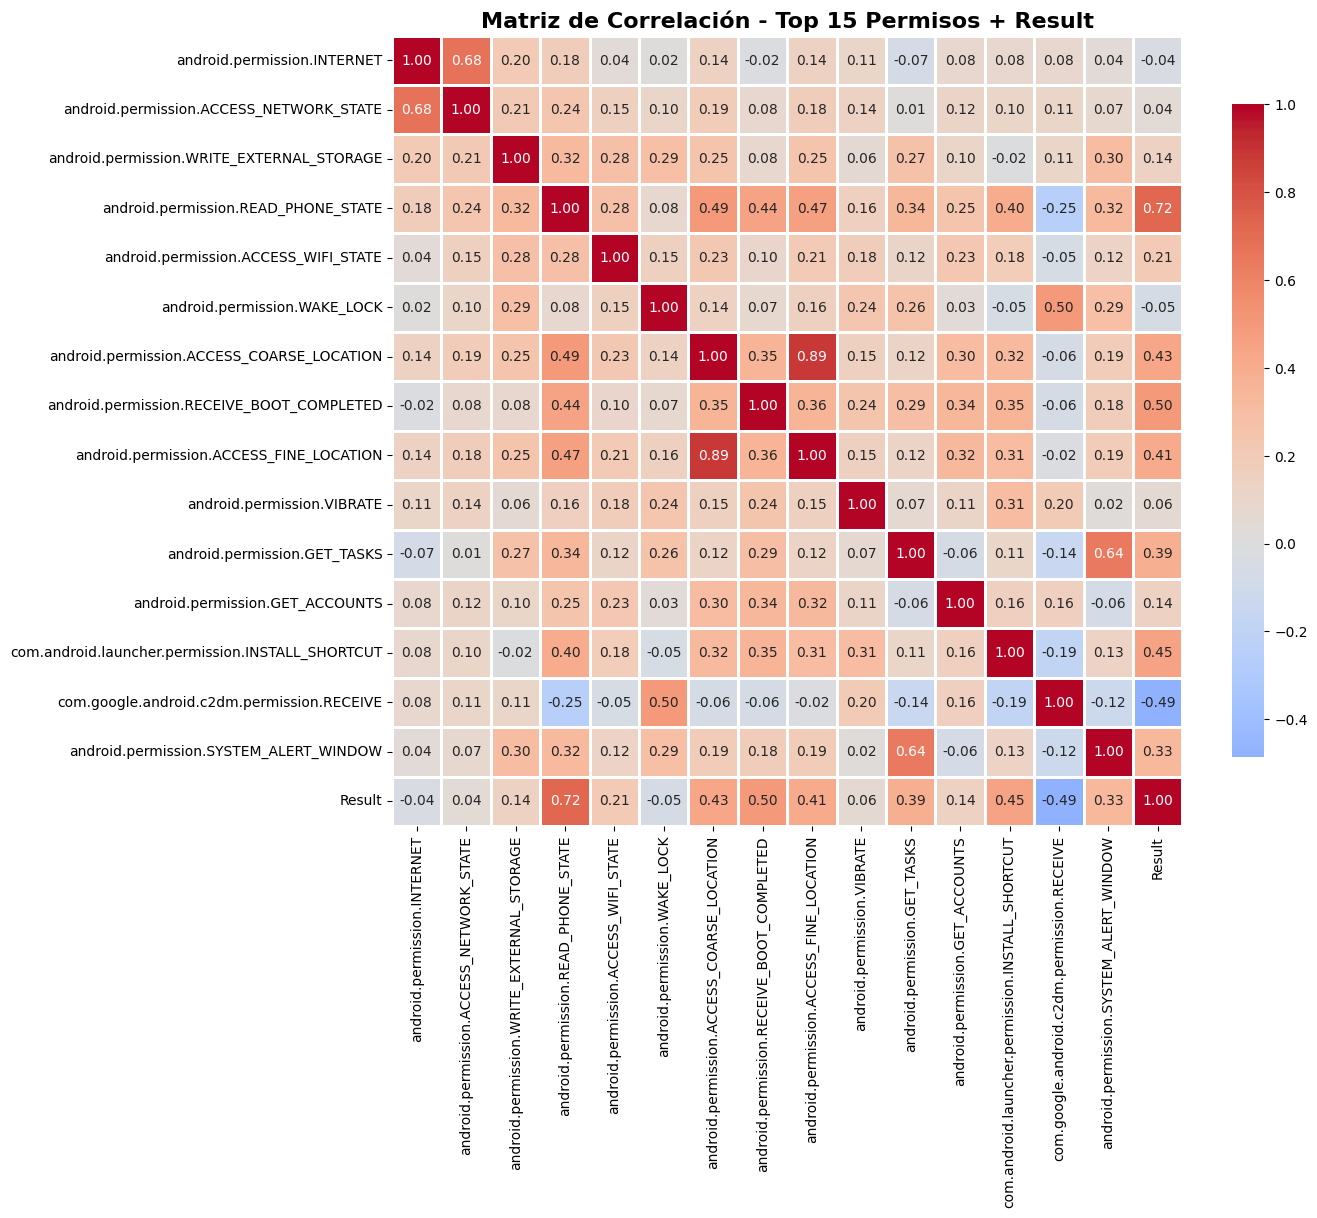

In [13]:
# Matriz de correlación
print("="*50)
print("MATRIZ DE CORRELACIÓN (Muestra de Permisos)")
print("="*50)

# Seleccionamos los 15 permisos más usados para la matriz
top_permissions = permission_usage.head(15).index.tolist()
if 'Result' in d.columns:
    top_permissions.append('Result')

# Creamos la matriz
plt.figure(figsize=(14, 12))
correlation_matrix = d[top_permissions].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación - Top 15 Permisos + Result', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

<font size="3">**7. RESUMEN FINAL DE NUESTRO DATASET**</font>


In [14]:
# Resumen final del análisis
print("="*50)
print("RESUMEN DEL ANÁLISIS")
print("="*50)
print(f"Dataset con {d.shape[0]:,} filas y {d.shape[1]} columnas")
print(f"Valores faltantes: {d.isnull().sum().sum()}")
print(f"Tipos de datos: {d.dtypes.value_counts().to_dict()}")
if 'Result' in d.columns:
    print(f"Distribución de clases:")
    for clase, count in d['Result'].value_counts().items():
        print(f"   - Clase {clase}: {count:,} ({count/len(d)*100:.2f}%)")

RESUMEN DEL ANÁLISIS
Dataset con 29,332 filas y 87 columnas
Valores faltantes: 0
Tipos de datos: {dtype('int64'): 87}
Distribución de clases:
   - Clase 1: 14,700 (50.12%)
   - Clase 0: 14,632 (49.88%)
